<a href="https://colab.research.google.com/github/trottag/Medidas_Electronicas_I_2022/blob/main/EJ3_TP2_MedElec_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 3:  Se dispone de un Sensor cuya tensión de salida presenta forma de onda triangular y Ro = 500Kohm  El ingeniero dispone de un multímetro UT60A con el que efectuó 5 mediciones en modo DC y 5 mediciones en AC.
Determinar los valores Pico(+) y Pico(-)  que entrega el sensor en vacio , con su incertidumbre
Mediciones:
a)	Multímetro en escala  DC , Vi promedio= 0,953V, STD=0,1mV
b)	Multímetro en escala  AC, Vi promedio = 1,057V,  STD=0,25mV
 


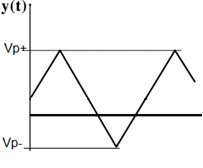

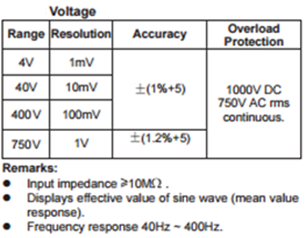

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

Multímetro en escala DC

$\bar{V_{i}} = 0,0953 V$
$STD = 0,1 mV$

In [13]:
v_med_dc_tester   = 0.953

#Incertidumbre TIPO A
desvio_estandard=0.0001
cantidad_mediciones_DC  = 5

#Incertidumbre TIPO B
CONST_ERROR_PORCENTUAL_V = 1      #Del manual del tester UT-60A EXPRESADOR PORCENTUALMENTE 1%
CONST_ERROR_CUENTA_V     = 5      #Del manual del tester UT-60A

#Pongo el tester en la escala de medicion de continua 100mV

V_DC_cuentas = 953               #Medicion expresada en cuentas

In [22]:
#Cálculo de incertidumbre de medición 

#Tipo A
uiV = desvio_estandard /np.sqrt(cantidad_mediciones_DC)
print(uiV)

#Tipo B
V_ERROR_PORCENTUAL_CUENTA = (CONST_ERROR_CUENTA_V /  V_DC_cuentas )* 100
ERROR_V = ((V_ERROR_PORCENTUAL_CUENTA+CONST_ERROR_PORCENTUAL_V)*v_med_dc_tester)/100
ujV = ERROR_V/sqrt(3)
print(ujV)

#Incertidumbre combinada
ucV_DC= sqrt(uiV**2 + ujV**2)
print(ucV_DC)

print("El resultado de la medicion es %0.4f +- %0.4f [V]"%(v_med_dc_tester,ucV_DC))


4.4721359549995795e-05
0.008388899411325264
0.008389018615626822
El resultado de la medicion es 0.9530 +- 0.0084 [V]


## Multimetro en escala AC

$\bar{V_{i}} = 1,057V V$
$STD = 0,25 mV$

In [23]:
v_med_ac_tester   = 1.057

#Incertidumbre TIPO A
desvio_estandard=0.00025
cantidad_mediciones_AC  = 5

#Incertidumbre TIPO B
CONST_ERROR_PORCENTUAL_V = 1      #Del manual del tester UT-60A EXPRESADOR PORCENTUALMENTE 1%
CONST_ERROR_CUENTA_V     = 5      #Del manual del tester UT-60A

#Pongo el tester en la escala de medicion de continua 4V
V_AC_cuentas = 1057               #Medicion expresada en cuentas

In [26]:
#Cálculo de incertidumbre de medición 

#Tipo A
uiV = desvio_estandard /np.sqrt(cantidad_mediciones_AC)
print(uiV)

#Tipo B
V_ERROR_PORCENTUAL_CUENTA = (CONST_ERROR_CUENTA_V /  V_AC_cuentas )* 100
ERROR_V = ((V_ERROR_PORCENTUAL_CUENTA+CONST_ERROR_PORCENTUAL_V)*v_med_ac_tester)/100
ujV = ERROR_V/np.sqrt(3)
print(ujV)

#Incertidumbre combinada
ucV_AC= sqrt(uiV**2 + ujV**2)
print(ucV_AC)

print("El resultado de la medicion es %0.4f +- %0.4f [V]"%(v_med_dc_tester,ucV_AC))

0.00011180339887498948
0.008989343691282473
0.008990038932062528
El resultado de la medicion es 0.9530 +- 0.0090 [V]


El valor medio de una señal triangular es:

$S_{\left|me\right|}=\frac{V_{p}}{2}$  
$K_{\left|me\right|}=\frac{\pi}{2\sqrt{2}}$

$S_{i}=K_{\left|me\right|}*S_{\left|me\right|}=\frac{\pi}{2\sqrt{2}}*\frac{Vp}{2}$

Siendo: 

1.   $S_{i}:$ Valor indicado por el multimetro
2.   $S_{\left|me\right|}:$Valor medio de la señal
3.   $K_{\left|me\right|}:$Constante de calibracion a la cual responde el multimetro


In [28]:
kme=np.pi/2/np.sqrt(2)      #Cte de calibracion tester

Si_ac=v_med_ac_tester     #Valor indicado por el tester

vp=2*Si_ac/kme

print('El valor pico de la señal triangular  es: Vp+ = Vp- = %1.4f'%(vp))

El valor pico de la señal triangular  es: Vp+ = Vp- = 1.9033


Tenemos que:
1. $V_{p}^{+}=V_{p}+V_{DC}=\frac{4\sqrt{2}}{\pi}*S_{i}+V_{DC}$
2. $V_{p}^{-}=-V_{p}+V_{DC}=-\frac{4\sqrt{2}}{\pi}*S_{i}+V_{DC}$ 
3. $V_{p}=\frac{4\sqrt{2}}{\pi}*S_{i}$

Para calcular la correlación, planteamos:

5. $U_{c}(V_{p}^{+})=\sqrt{(\frac{\partial V_{p}^{+}}{\partial S_{i}}*U_{c}(S_{i}))^2+(\frac{\partial V_{p}^{+}}{\partial V_{DC}}*U_{c}(V_{DC}))^2}$
6. $U_{c}(V_{p}^{-})=\sqrt{(\frac{\partial V_{p}^{-}}{\partial S_{i}}*U_{c}(S_{i}))^2+(\frac{\partial V_{p}^{-}}{\partial V_{DC}}*U_{c}(V_{DC}))^2}$

Planteamos las derivadas parciales
7. $\frac{\partial V_{p}^{-}}{\partial V_{DC}} =\frac{\partial V_{p}^{+}}{\partial V_{DC}} =1$

8. $-\frac{\partial V_{p}^{-}}{\partial S_{i}}=\frac{\partial V_{p}^{+}}{\partial S_{i}}=\frac {4\sqrt{2}}{\pi}$

Podemos decir que:

9. $U_{c}(V_{p}^{+})=U_{c}(V_{p}^{-})$

Reemplazando en las expresiones de la incertidumbre combinada, nos queda:

In [29]:
dvp_dvdc = 1
dvp_dsi  = 4*np.sqrt(2)/np.pi
ucV_AC
uc=np.sqrt((dvp_dsi*ucV_AC)**2+(ucV_DC)**2)
uc

0.018232364770890092

In [30]:
#Expansión de la incertidumbre combinada asumiendo K=2

k = 2
uc_exp= k*uc

Tenemos que aplicar la correccion del error de metodo al resultado:

De la hoja de datos del multimetro tomo: $Z_{i} = 10 M\Omega$

$E_{m} = \frac{1}{1+\frac{R_{o}}{Z_{i}}}-1$ y $V = \frac{V_{i}}{1+E_{m}}$

Donde: 
1.   $R_{o}: Impedancia\,del\,sensor$
2.   $Z_{i}: Impedancia\,del\,entrada\,del\,multimetro$
3.   $V_{i}: Media\,de\,la\,medicion\,tomada\,con\,el\,multimetro$

In [33]:
z_input_tester   = 10
R_salida_sensor  = 0.5

vp_positivo = vp+v_med_dc_tester
vp_negativo = -vp+v_med_dc_tester

print('El valor del pico positivo es:', vp_positivo)
print('El valor del pico negativo es:', vp_negativo)

#Corrección del error sistematico de medicion

Em= 1/(1+R_salida_sensor/z_input_tester)-1

vp_positivo_corregido=vp_positivo/(1+Em)
vp_negativo_corregido=vp_negativo/(1+Em)
print('El error de metodo es:',Em)
print('La  medicion real del pico positivo es:',vp_positivo_corregido)
print('La  medicion real del pico negativo es:',vp_negativo_corregido)

#Resultado final de la medición, con un intervalo de confianza del 95%:
print('El valor del pico positivo es Vp+ = %1.4fV ± %1.4fV'%(vp_positivo_corregido,uc_exp))
print('El valor del pico negativo es Vp- = %1.4fV ± %1.4fV'%(vp_negativo_corregido,uc_exp))

El valor del pico positivo es: 2.8562686923561222
El valor del pico negativo es: -0.9502686923561222
El error de metodo es: -0.04761904761904767
La  medicion real del pico positivo es: 2.9990821269739287
La  medicion real del pico negativo es: -0.9977821269739284
El valor del pico positivo es Vp+ = 2.9991V ± 0.0365V
El valor del pico negativo es Vp- = -0.9978V ± 0.0365V
